## Regression on Boston Housing Dataset


La descripción de todas las variables se da a continuación:

**CRIM**: Tasa de delincuencia per cápita por ciudad

**ZN**: Proporción de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados

**INDUS**: Proporción de acres comerciales no minoristas por ciudad

**CHAS**: Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)

**NOX**: concentración de óxido nítrico (partes por 10 millones)

**RM**: Número medio de habitaciones por vivienda

**EDAD**: Proporción de unidades ocupadas por el propietario construidas antes de 1940

**DIS**: distancias ponderadas a cinco centros de empleo de Boston

**RAD**: Índice de accesibilidad a carreteras radiales

**IMPUESTO**: Tasa de impuesto a la propiedad de valor total por $ 10,000

**B**: 1000 (Bk - 0.63) ², donde Bk es la proporción de [personas de ascendencia afroamericana] por ciudad

**LSTAT**: Porcentaje de menor estatus de la población

**MEDV**: Valor medio de las viviendas ocupadas por sus propietarios en $ 1000
  
  



### Realiza un estudio comparativo de los modelos de regresión lineal simple, regresión lineal múltiple (aplicando métodos de selección de variables) y regresión polinómica.

Importamos las librerías

In [14]:
import numpy as np
import math
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

Cargamos el dataset

In [15]:
# Load Boston housing dataset from external source
boston = pd.read_csv("../data/BostonHousing.csv")

# Display the first few rows of the dataset
print("Boston Housing Dataset:")
print(boston.head())

Boston Housing Dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [16]:
boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

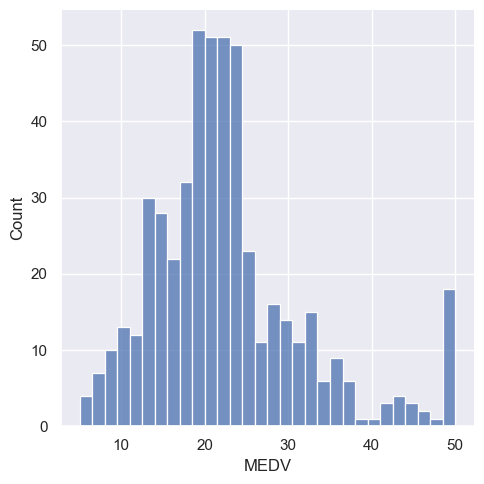

In [17]:
sns.set_theme(rc = {'figure.figsize': (11.7, 8.27)})
sns.displot(boston['MEDV'], bins = 30)
plt.show()

<Axes: >

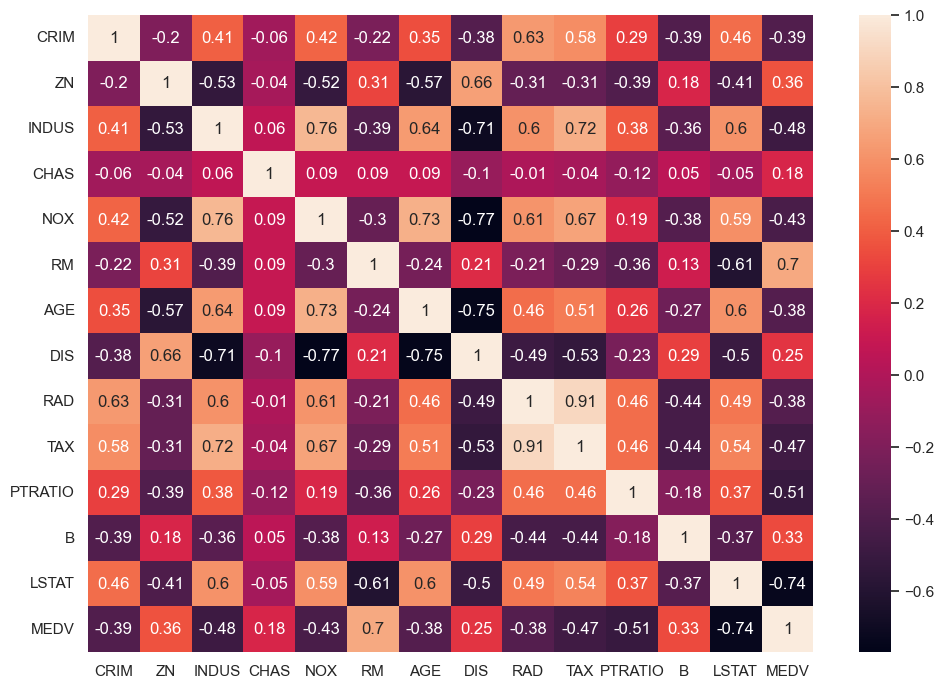

In [18]:
correlation_matrix = boston.corr().round(2)
sns.heatmap(data = correlation_matrix, annot = True)

In [19]:
def polynomial_regresion(X_test, y_test, X_train, y_train, degree):
    poly_features = PolynomialFeatures(degree = degree)
    X_train_poly = poly_features.fit_transform(X_train)
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    
    y_train_predict = poly_model.predict(X_train_poly)
    rmse = math.sqrt(mean_squared_error(y_train, y_train_predict))
    r2 = r2_score(y_train, y_train_predict)

    print("RMSE: {}".format(rmse))
    print("R2: {}".format(r2))

    y_test_predict = poly_model.predict(poly_features.transform(X_test))
    rmse = math.sqrt(mean_squared_error(y_test, y_test_predict))
    r2 = r2_score(y_test, y_test_predict)

    print("RMSE: {}".format(rmse))
    print("R2: {}".format(r2))

In [20]:
X = boston[['LSTAT']]
y = boston['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [21]:
polynomial_regresion(X_test, y_test, X_train,  y_train, 6)

RMSE: 5.087850450670139
R2: 0.6946101481776106
RMSE: 5.435834568775507
R2: 0.645131574596566
